# EXERCISE SHEET 3, EXERCISE 4: The Friendship Paradox & Sampling

In [1]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sample_size = 1000

In [3]:
G = nx.read_edgelist('opsahl-powergrid/out.opsahl-powergrid', comments = '%', nodetype=int)

# QUESTION 1
What is the average degree ⟨k⟩ of the network?

# Answer 1

In [4]:
#average degree of the graph
average_degree = np.sum([v for k, v in G.degree()]) / G.number_of_nodes()
line_average_degree = average_degree * np.ones(sample_size)

# QUESTION 2
Sample (with replacement) a sample $S_{1000}$ consisting of 1000 nodes drawn uniformly at random from the network, one element at a time. At each step 1 ⩽ i ⩽ 1000 of the sampling procedure, compute the average degree of the sample $S_i$.

# Answer 2

In [5]:
H = G.nodes()
S = rd.choices(list(H), k=sample_size)
degree_S = [v for k, v in G.degree(S)]

T = rd.choices(list(H), k=sample_size)

In [6]:
Evoulution_mean_S = []
for i in range(sample_size):
    Evoulution_mean_S.append(np.mean(degree_S[:i+1]))

# QUESTION 3
Sample (with replacement) a second sample $T_1000$ consisting of 1000 nodes. In this case, first, select uniformly at random one node of the network, then select one node among its neighbours (always uniformly at random). Again, at each step i (1 ⩽ i ⩽ 1000), compute the average degree of the sample $T_i$.

# Answer 3

In [7]:
neighbours_sample = []
for i in T:
    neighbours_sample.append(rd.sample(list(G.neighbors(i)), 1)[0])

degree_neighbours = [v for k, v in G.degree(neighbours_sample)]

Evoulution_mean_neighbours_sample = []
for i in range(sample_size):
    Evoulution_mean_neighbours_sample.append(np.mean(degree_neighbours[:i+1]))

# QUESTION 4
Plot the evolution of the degree’s averages of the two samples and add a horizontal line y = ⟨k⟩ to the plot as a reference.

# Answer 4

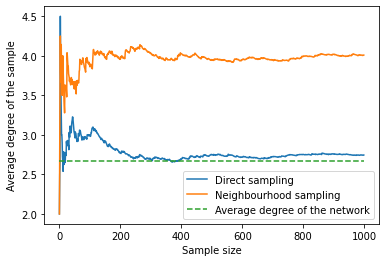

In [8]:
# plot lines

plt.plot(Evoulution_mean_S, label = "Direct sampling")
plt.plot(Evoulution_mean_neighbours_sample, label = "Neighbourhood sampling")
plt.plot(line_average_degree, label = "Average degree of the network", linestyle="--")

plt.xlabel('Sample size')
plt.ylabel('Average degree of the sample')
plt.legend()
plt.show()

# QUESTION 5
Implement two functions that compute the degree correlation of a network; the first according to Equation 3 (using two sums over all pair of nodes), the second one according to Equation 9 (using a sum over all edges and three sums over all nodes).

# Answer 5

In [9]:
def degree_correlation_adj_matrix(G):
    edges_G = G.edges()
    M = len(edges_G)
    degree_G = G.degree()
    r_numerator = 0
    r_denominator = 0
    G_matrix = nx.adjacency_matrix(G)

    for i in G.nodes():
        for j in G.nodes():
            k_i = degree_G(i)
            k_j = degree_G(j)
            kikj = k_i * k_j

            independent_contribution_kikj = pow(kikj, 2) / (2*M)
            r_numerator -= independent_contribution_kikj
            r_denominator -= independent_contribution_kikj
            if (i,j) in edges_G:
                r_numerator +=  kikj
            if i == j:
                r_denominator += k_i * kikj
    R = r_numerator / r_denominator
    return(R)

In [10]:
def degree_correlation_fast(G):
    S_e = 0
    for i in G.edges():
        S_e += 2*G.degree()[i[0]]*G.degree()[i[1]]

    S_1 = 0
    S_2 = 0
    S_3 = 0
    
    for i in G.nodes():
        degree_i = G.degree()[i]
        S_1 += degree_i
        S_2 += degree_i ** 2
        S_3 += degree_i ** 3

    r = (S_e * S_1 - S_2 ** 2) / (S_3*S_1 - S_2 ** 2)
    return(r)

# QUESTION 6
Use both functions to compute the degree correlation of the US Power Grid network and compare the results and the execution times. You can compare your results with the built-in function from NetworkX. You can use the line magics %timeit to measure execution times

# Answer 6

In [11]:
degree_correlation_adj_matrix(G)

0.0034569877387602833

In [12]:
degree_correlation_fast(G)

0.0034569877442048235

In [13]:
%timeit degree_correlation_adj_matrix(G)
%timeit degree_correlation_fast(G)

1min 30s ± 3.53 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
59.7 ms ± 3.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The implementation degree_correlation_fast is considerably faster then the degree_correlation_adj_matrix one: the network is sparse, so the operations over the edge list are computationally advantagious.